In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt as r

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train.head()

,Unnamed: 0,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score
0,0,male,group C,some college,standard,none,61,62,61
1,1,female,group C,associate's degree,standard,none,62,53,53
2,2,female,group C,some college,free/reduced,completed,75,70,67
3,3,male,group C,some high school,free/reduced,none,76,65,79
4,4,male,group A,high school,free/reduced,none,58,44,53


In [7]:
w_r = train[['reading score','writing score']]
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, interaction_only=False,  
                        include_bias=False)
res = pf.fit_transform(w_r)

In [8]:
pd.DataFrame(pf.powers_, columns=['reading score',  
                                  'writing score'])

,reading score,writing score
0,1,0
1,0,1
2,2,0
3,1,1
4,0,2


In [9]:
intr_features = pd.DataFrame(res, columns=['reading score', 'writing score',  
                                           'reading score ^2', 
                                           'reading score x writing score',  
                                           'writing score ^2'])
intr_features.head(5)

,reading score,writing score,reading score ^2,reading score x writing score,writing score ^2
0,61.0,62.0,3721.0,3782.0,3844.0
1,62.0,53.0,3844.0,3286.0,2809.0
2,75.0,70.0,5625.0,5250.0,4900.0
3,76.0,65.0,5776.0,4940.0,4225.0
4,58.0,44.0,3364.0,2552.0,1936.0


In [10]:
train['reading score ^2'] = train['reading score'] * train['reading score']
train['writing score ^2'] = train['writing score'] * train['writing score']
train['reading score x writing score'] = train['reading score']*train['writing score']
train['reading score ^3'] = train['reading score'] * train['reading score']* train['reading score']
train['writing score ^3'] = train['writing score'] * train['writing score']* train['reading score']

In [11]:
train['avg'] = (train['reading score']+train['writing score'])/2

In [12]:
train['writerank'] = train['writing score'].rank(method = 'first')

In [13]:
train['readrank'] = train[['reading score']].rank(method = 'first')

In [14]:
train['avgrank'] = train['avg'].rank(method = 'first')

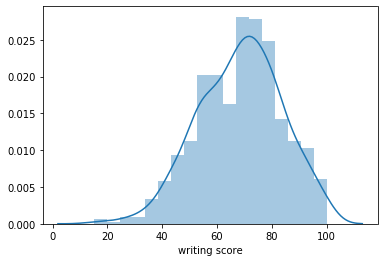

In [15]:
sns.distplot(train['writing score'])

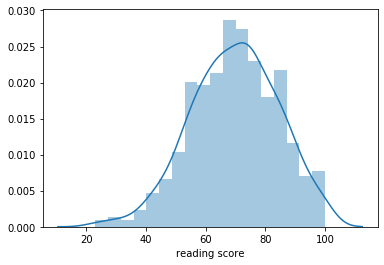

In [16]:
sns.distplot(train['reading score'])

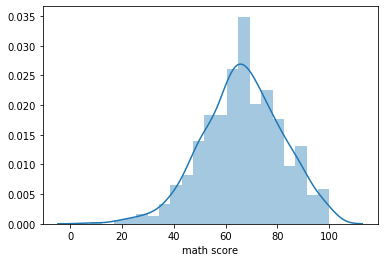

In [17]:
sns.distplot(train['math score'])

In [18]:
train['reading score'].mean()

69.75142857142858

In [19]:
train['read_meandev'] = train['reading score'] - 69.75142857142858

In [20]:
train['writing score'].mean()

68.49714285714286

In [21]:
train['write_meandev'] = train['writing score'] - 68.49714285714286

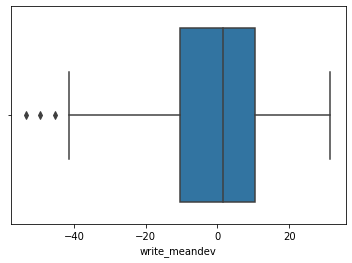

In [22]:
sns.boxplot(train['write_meandev'])

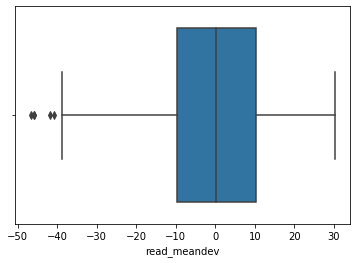

In [23]:
sns.boxplot(train['read_meandev'])

In [24]:
train.head()

,Unnamed: 0,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score,reading score ^2,writing score ^2,reading score x writing score,reading score ^3,writing score ^3,avg,writerank,readrank,avgrank,read_meandev,write_meandev
0,0,male,group C,some college,standard,none,61,62,61,3721,3844,3782,226981,234484,61.5,222.0,187.0,206.0,-8.751429,-6.497143
1,1,female,group C,associate's degree,standard,none,62,53,53,3844,2809,3286,238328,174158,57.5,108.0,202.0,158.0,-7.751429,-15.497143
2,2,female,group C,some college,free/reduced,completed,75,70,67,5625,4900,5250,421875,367500,72.5,347.0,434.0,400.0,5.248571,1.502857
3,3,male,group C,some high school,free/reduced,none,76,65,79,5776,4225,4940,438976,321100,70.5,265.0,453.0,356.0,6.248571,-3.497143
4,4,male,group A,high school,free/reduced,none,58,44,53,3364,1936,2552,195112,112288,51.0,40.0,143.0,75.0,-11.751429,-24.497143


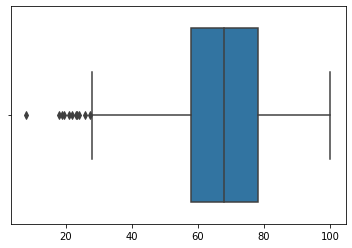

In [25]:
sns.boxplot(train[['avg','math score']])

In [26]:
train[train['avg']<30]

,Unnamed: 0,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score,reading score ^2,writing score ^2,reading score x writing score,reading score ^3,writing score ^3,avg,writerank,readrank,avgrank,read_meandev,write_meandev
140,140,male,group B,high school,free/reduced,none,24,15,30,576,225,360,13824,5400,19.5,1.0,2.0,1.0,-45.751429,-53.497143
152,152,male,group C,some college,free/reduced,none,28,27,35,784,729,756,21952,20412,27.5,4.0,4.0,4.0,-41.751429,-41.497143
286,286,female,group B,high school,free/reduced,none,24,23,8,576,529,552,13824,12696,23.5,3.0,3.0,3.0,-45.751429,-45.497143
497,497,female,group C,high school,standard,none,29,30,29,841,900,870,24389,26100,29.5,7.0,5.0,5.0,-40.751429,-38.497143
623,623,male,group A,some college,free/reduced,none,23,19,28,529,361,437,12167,8303,21.0,2.0,1.0,2.0,-46.751429,-49.497143


In [27]:
train = train.drop(train.index[286])

In [28]:
mean = np.mean(train['avg']) 
std = np.std(train['avg']) 

In [29]:
threshold = 2
outlier = [] 
for i in train['avg']: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier)

outlier in dataset is [98.5, 99.5, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 99.5, 99.5, 100.0, 100.0]


In [30]:
train[train['avg']>97]

,Unnamed: 0,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score,reading score ^2,writing score ^2,reading score x writing score,reading score ^3,writing score ^3,avg,writerank,readrank,avgrank,read_meandev,write_meandev
69,69,female,group D,master's degree,free/reduced,completed,95,100,85,9025,10000,9500,857375,950000,97.5,690.0,672.0,685.0,25.248571,31.502857
129,129,female,group A,some high school,standard,completed,100,97,92,10000,9409,9700,1000000,940900,98.5,684.0,688.0,689.0,30.248571,28.502857
134,134,female,group E,master's degree,standard,completed,99,100,94,9801,10000,9900,970299,990000,99.5,691.0,686.0,690.0,29.248571,31.502857
197,197,female,group E,bachelor's degree,standard,none,100,100,100,10000,10000,10000,1000000,1000000,100.0,692.0,689.0,693.0,30.248571,31.502857
222,222,female,group D,master's degree,standard,none,100,100,92,10000,10000,10000,1000000,1000000,100.0,693.0,690.0,694.0,30.248571,31.502857
242,242,female,group E,bachelor's degree,standard,completed,100,100,99,10000,10000,10000,1000000,1000000,100.0,694.0,691.0,695.0,30.248571,31.502857
302,302,male,group E,bachelor's degree,standard,completed,100,100,100,10000,10000,10000,1000000,1000000,100.0,695.0,693.0,696.0,30.248571,31.502857
388,388,female,group C,associate's degree,standard,completed,96,99,96,9216,9801,9504,884736,940896,97.5,688.0,680.0,686.0,26.248571,30.502857
389,389,female,group E,associate's degree,standard,none,100,100,100,10000,10000,10000,1000000,1000000,100.0,696.0,694.0,697.0,30.248571,31.502857
398,398,female,group D,some high school,standard,completed,100,100,97,10000,10000,10000,1000000,1000000,100.0,697.0,695.0,698.0,30.248571,31.502857


In [31]:
test[test['reading score']>99]

,Unnamed: 0,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
133,133,female,group D,bachelor's degree,standard,none,100,100
190,190,female,group C,bachelor's degree,standard,completed,100,99
256,256,female,group D,bachelor's degree,free/reduced,completed,100,100
298,298,female,group D,master's degree,standard,none,100,100


In [32]:
test[test['writing score']>99]

,Unnamed: 0,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
133,133,female,group D,bachelor's degree,standard,none,100,100
256,256,female,group D,bachelor's degree,free/reduced,completed,100,100
298,298,female,group D,master's degree,standard,none,100,100


In [33]:
#train = train.drop(train.index[432])

In [34]:
#train.loc[432,'math score'] = 'NaN'

In [35]:
#train = train.drop(train.index[450])

In [36]:
#train.loc[450,'math score'] = 'NaN'

In [37]:
#train.isna().sum()

In [38]:
train['Reading_AvgStatus'] = np.where(train['reading score']<=69.75142857142858, 'F', 'P')

In [39]:
train['Reading_AvgStatus'].value_counts()

P    364
F    335
Name: Reading_AvgStatus, dtype: int64

In [40]:
train['Writing_AvgStatus'] = np.where(train['writing score']<=68.49714285714286, 'F', 'P')

In [41]:
train['ReadCourse_Avg'] = train.apply(lambda x : 'CompleteFail' if x['Reading_AvgStatus'] == 'F' and  x['test preparation course'] == 'completed' else ( 'CompletePass' if x['Reading_AvgStatus'] == 'P' and  x['test preparation course'] == 'completed' else ('IncompletePass' if x['Reading_AvgStatus'] == 'P' and  x['test preparation course'] == 'none' else 'IncompleteFail')) , axis =1)

In [42]:
train['WriteCourse_Avg'] = train.apply(lambda x : 'CompleteFail' if x['Writing_AvgStatus'] == 'F' and  x['test preparation course'] == 'completed' else ( 'CompletePass' if x['Writing_AvgStatus'] == 'P' and  x['test preparation course'] == 'completed' else ('IncompletePass' if x['Writing_AvgStatus'] == 'P' and  x['test preparation course'] == 'none' else 'IncompleteFail')) , axis =1)

In [43]:
train['OverAll_PassStatus'] = train.apply(lambda x : 'F' if x['Reading_AvgStatus'] == 'F' or x['Writing_AvgStatus'] == 'F' else 'P', axis =1)

In [44]:
train['ReadCourse_Avg'].value_counts()

IncompleteFail    252
IncompletePass    203
CompletePass      161
CompleteFail       83
Name: ReadCourse_Avg, dtype: int64

In [45]:
train['WriteCourse_Avg'].value_counts()

IncompleteFail    258
IncompletePass    197
CompletePass      172
CompleteFail       72
Name: WriteCourse_Avg, dtype: int64

In [46]:
train.head()

,Unnamed: 0,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score,reading score ^2,...,writerank,readrank,avgrank,read_meandev,write_meandev,Reading_AvgStatus,Writing_AvgStatus,ReadCourse_Avg,WriteCourse_Avg,OverAll_PassStatus
0,0,male,group C,some college,standard,none,61,62,61,3721,...,222.0,187.0,206.0,-8.751429,-6.497143,F,F,IncompleteFail,IncompleteFail,F
1,1,female,group C,associate's degree,standard,none,62,53,53,3844,...,108.0,202.0,158.0,-7.751429,-15.497143,F,F,IncompleteFail,IncompleteFail,F
2,2,female,group C,some college,free/reduced,completed,75,70,67,5625,...,347.0,434.0,400.0,5.248571,1.502857,P,P,CompletePass,CompletePass,P
3,3,male,group C,some high school,free/reduced,none,76,65,79,5776,...,265.0,453.0,356.0,6.248571,-3.497143,P,F,IncompletePass,IncompleteFail,F
4,4,male,group A,high school,free/reduced,none,58,44,53,3364,...,40.0,143.0,75.0,-11.751429,-24.497143,F,F,IncompleteFail,IncompleteFail,F


In [47]:
train['Ethinicity_Gen'] = train.apply(lambda x : 'GroupAMale' if x['ethnicity'] == 'group A' and  x['gender'] == 'male' else ('GroupAFemale' if x['ethnicity'] == 'group A' and  x['gender'] == 'female' else ('GroupBMale' if x['ethnicity'] == 'group B' and  x['gender'] == 'male'else ('GroupBFemale' if x['ethnicity'] == 'group B' and  x['gender'] == 'female' else ('GroupCMale' if x['ethnicity'] == 'group C' and  x['gender'] == 'male' else ('GroupCFemale' if x['ethnicity'] == 'group C' and  x['gender'] == 'female' else ('GroupDMale' if x['ethnicity'] == 'group D' and  x['gender'] == 'male' else ('GroupDFemale' if x['ethnicity'] == 'group D' and  x['gender'] == 'female' else ('GroupEFemale' if x['ethnicity'] == 'group E' and  x['gender'] == 'female' else 'GroupEMale')))))))), axis =1)

In [48]:
train['Ethinicity_lunch'] = train.apply(lambda x : 'GroupAstd' if x['ethnicity'] == 'group A' and  x['lunch'] == 'standard' else ('GroupAfree' if x['ethnicity'] == 'group A' and  x['lunch'] == 'free/reduced' else ('GroupBstd' if x['ethnicity'] == 'group B' and  x['lunch'] == 'standard'else ('GroupBfree' if x['ethnicity'] == 'group B' and  x['lunch'] == 'free/reduced' else ('GroupCstd' if x['ethnicity'] == 'group C' and  x['lunch'] == 'standard' else ('GroupCfree' if x['ethnicity'] == 'group C' and  x['lunch'] == 'free/reduced' else ('GroupDstd' if x['ethnicity'] == 'group D' and  x['lunch'] == 'standard' else ('GroupDfree' if x['ethnicity'] == 'group D' and  x['lunch'] == 'free/reduced' else ('GroupEstd' if x['ethnicity'] == 'group E' and  x['lunch'] == 'standard' else 'GroupEfree')))))))), axis =1)

In [49]:
train['Ethinicity_lunch'].value_counts()

GroupCstd     144
GroupDstd     119
GroupBstd      89
GroupCfree     75
GroupEstd      67
GroupDfree     65
GroupBfree     51
GroupAstd      35
GroupEfree     31
GroupAfree     23
Name: Ethinicity_lunch, dtype: int64

In [50]:
train['Ethinicity_Gen'].value_counts()

GroupCFemale    127
GroupDFemale     96
GroupCMale       92
GroupDMale       88
GroupBFemale     76
GroupBMale       64
GroupEMale       51
GroupEFemale     47
GroupAMale       38
GroupAFemale     20
Name: Ethinicity_Gen, dtype: int64

In [51]:
train['parental level of education'].value_counts()

some college          175
associate's degree    138
high school           133
some high school      129
bachelor's degree      81
master's degree        43
Name: parental level of education, dtype: int64

In [52]:
train['Parent Degree'] = train.apply(lambda x : 'Graduate' if x['parental level of education'] == "master's degree" or  x['parental level of education'] == "bachelor's degree" or x['parental level of education'] == "associate's degree" else ( 'NotGrad' ), axis =1)

In [53]:
def define_grades(avg):
    if avg <= 39:
        return 'F'
    elif avg >= 40 and avg <= 50:
        return 'E'
    elif avg >= 51 and avg <= 60:
        return 'D'
    elif avg >= 61 and avg <= 70:
        return 'C'
    elif avg >= 71 and avg <= 80:
        return 'B'
    elif avg >= 81 and avg <= 90:
        return 'A'
    elif avg >= 91 and avg <= 100:
        return 'A+'
    else:
        return ''

In [54]:
train['grades'] = train['avg'].apply(lambda x : define_grades(x))
train.head()

,Unnamed: 0,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score,reading score ^2,...,write_meandev,Reading_AvgStatus,Writing_AvgStatus,ReadCourse_Avg,WriteCourse_Avg,OverAll_PassStatus,Ethinicity_Gen,Ethinicity_lunch,Parent Degree,grades
0,0,male,group C,some college,standard,none,61,62,61,3721,...,-6.497143,F,F,IncompleteFail,IncompleteFail,F,GroupCMale,GroupCstd,NotGrad,C
1,1,female,group C,associate's degree,standard,none,62,53,53,3844,...,-15.497143,F,F,IncompleteFail,IncompleteFail,F,GroupCFemale,GroupCstd,Graduate,D
2,2,female,group C,some college,free/reduced,completed,75,70,67,5625,...,1.502857,P,P,CompletePass,CompletePass,P,GroupCFemale,GroupCfree,NotGrad,B
3,3,male,group C,some high school,free/reduced,none,76,65,79,5776,...,-3.497143,P,F,IncompletePass,IncompleteFail,F,GroupCMale,GroupCfree,NotGrad,
4,4,male,group A,high school,free/reduced,none,58,44,53,3364,...,-24.497143,F,F,IncompleteFail,IncompleteFail,F,GroupAMale,GroupAfree,NotGrad,D


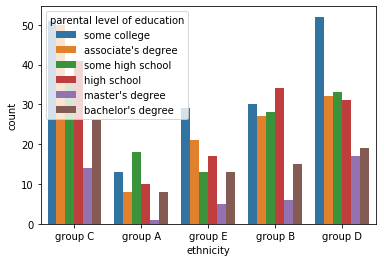

In [55]:
sns.countplot(x= 'ethnicity', hue= 'parental level of education', data= train)

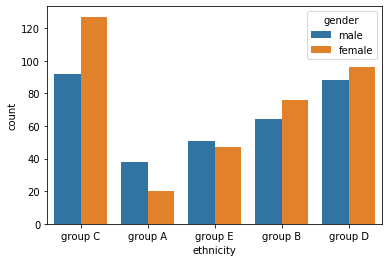

In [56]:
sns.countplot(x= 'ethnicity', hue= 'gender', data= train)

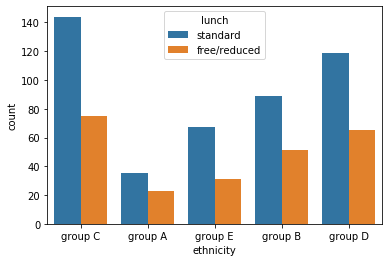

In [57]:
sns.countplot(x= 'ethnicity', hue= 'lunch', data= train)

In [58]:
#Approx calcs from graph
#Grp c - 70 free, 140 std - 1:2 free:std
#grp a - 25 free, 30 std - 5:6 free : Std
#grp e - 30 free, 70 std   3:7 free:std
#grp b - 50 free, 90 std
#grp d - 120 std, 70 free

In [59]:
train.isna().sum()

Unnamed: 0                       0
gender                           0
ethnicity                        0
parental level of education      0
lunch                            0
test preparation course          0
reading score                    0
writing score                    0
math score                       0
reading score ^2                 0
writing score ^2                 0
reading score x writing score    0
reading score ^3                 0
writing score ^3                 0
avg                              0
writerank                        0
readrank                         0
avgrank                          0
read_meandev                     0
write_meandev                    0
Reading_AvgStatus                0
Writing_AvgStatus                0
ReadCourse_Avg                   0
WriteCourse_Avg                  0
OverAll_PassStatus               0
Ethinicity_Gen                   0
Ethinicity_lunch                 0
Parent Degree                    0
grades              

In [60]:
train['ethnicity'].value_counts()

group C    219
group D    184
group B    140
group E     98
group A     58
Name: ethnicity, dtype: int64

In [61]:
train['test preparation course'].value_counts()

none         455
completed    244
Name: test preparation course, dtype: int64

In [62]:
train['parental level of education'].value_counts()

some college          175
associate's degree    138
high school           133
some high school      129
bachelor's degree      81
master's degree        43
Name: parental level of education, dtype: int64

In [63]:
train['lunch'].value_counts()

standard        454
free/reduced    245
Name: lunch, dtype: int64

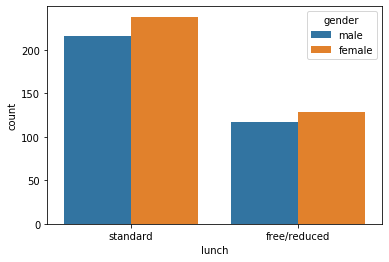

In [64]:
sns.countplot(x= 'lunch', hue= 'gender', data= train)

In [65]:
train.drop(['Unnamed: 0'], axis=1, inplace=True)

In [66]:
train.shape

(699, 28)

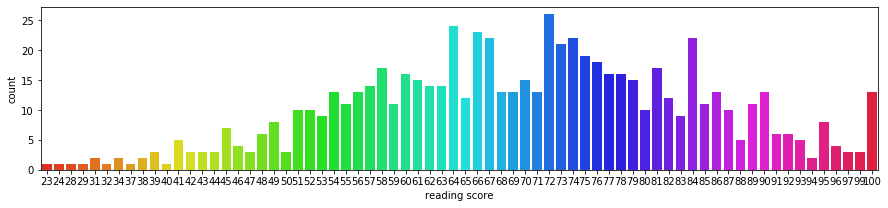

In [67]:
plt.figure(figsize = (15,3))
sns.countplot(train['reading score'], palette = 'hsv')

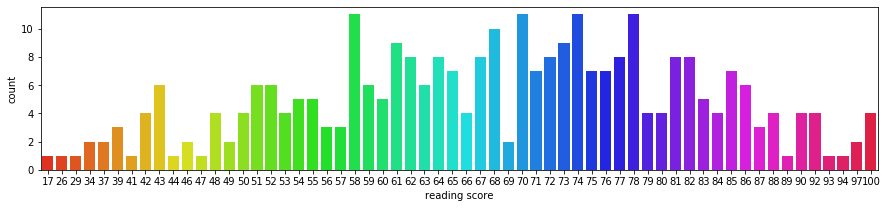

In [68]:
plt.figure(figsize = (15,3))
sns.countplot(test['reading score'], palette = 'hsv')

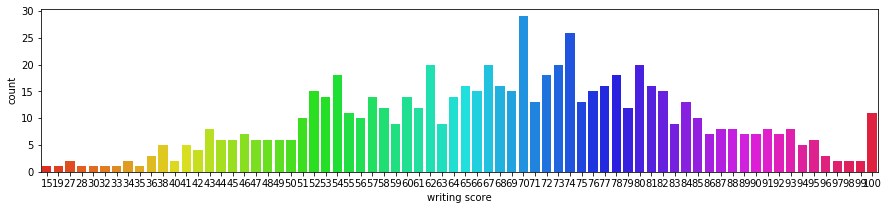

In [69]:
plt.figure(figsize = (15,3))
sns.countplot(train['writing score'], palette = 'hsv')

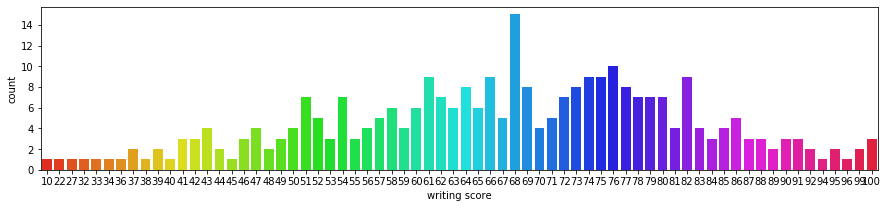

In [70]:
plt.figure(figsize = (15,3))
sns.countplot(test['writing score'], palette = 'hsv')

In [71]:
bins_read = pd.IntervalIndex.from_tuples([(15,30), (30, 45), (45, 60), (60, 75), (75, 90), (90, 100)])
train['reading score_bins'] = pd.cut(train['reading score'], bins=bins_read)
test['reading score_bins'] = pd.cut(test['reading score'], bins=bins_read)

In [72]:
bins_write = pd.IntervalIndex.from_tuples([(9,20), (20, 30), (30, 40), (40,50), (50, 60), (60,70),(70,80),(80,90),(90,100)])
train['write score_bins'] = pd.cut(train['writing score'], bins=bins_write)
test['write score_bins'] = pd.cut(test['writing score'], bins=bins_write)

In [73]:
avg_bin = pd.IntervalIndex.from_tuples([(10,20), (20, 30), (30, 40), (40,50), (50, 60), (60,70),(70,80),(80,90),(90,100)])
train['avg score_bins'] = pd.cut(train['avg'], bins= avg_bin)

In [74]:
train['tot'] = train['reading score'] + train['writing score']
train['mean'] = np.mean(train['tot'])

In [75]:
train['totmean'] = train['tot'] - train['mean']

In [76]:
train['totroot'] = np.sqrt(train['reading score']) + np.sqrt(train['writing score'])

In [77]:
train.head()

,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score,reading score ^2,writing score ^2,...,Ethinicity_lunch,Parent Degree,grades,reading score_bins,write score_bins,avg score_bins,tot,mean,totmean,totroot
0,male,group C,some college,standard,none,61,62,61,3721,3844,...,GroupCstd,NotGrad,C,"(60, 75]","(60, 70]","(60, 70]",123,138.379113,-15.379113,15.684258
1,female,group C,associate's degree,standard,none,62,53,53,3844,2809,...,GroupCstd,Graduate,D,"(60, 75]","(50, 60]","(50, 60]",115,138.379113,-23.379113,15.154118
2,female,group C,some college,free/reduced,completed,75,70,67,5625,4900,...,GroupCfree,NotGrad,B,"(60, 75]","(60, 70]","(70, 80]",145,138.379113,6.620887,17.026854
3,male,group C,some high school,free/reduced,none,76,65,79,5776,4225,...,GroupCfree,NotGrad,,"(75, 90]","(60, 70]","(70, 80]",141,138.379113,2.620887,16.780056
4,male,group A,high school,free/reduced,none,58,44,53,3364,1936,...,GroupAfree,NotGrad,D,"(45, 60]","(40, 50]","(50, 60]",102,138.379113,-36.379113,14.249023


In [78]:
train['readpercent'] = (train['reading score']/train['tot'])*100
train['writepercent'] = (train['writing score']/train['tot'])*100

In [79]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()

In [80]:
train['test preparation course']= label_encoder.fit_transform(train['test preparation course']) 
train['gender']= label_encoder.fit_transform(train['gender'])
train['lunch']= label_encoder.fit_transform(train['lunch'])
train['OverAll_PassStatus']= label_encoder.fit_transform(train['OverAll_PassStatus'])

In [81]:
train = pd.get_dummies(train, columns=['ethnicity', 'parental level of education','write score_bins','reading score_bins','Reading_AvgStatus','Writing_AvgStatus','grades','ReadCourse_Avg','WriteCourse_Avg'], drop_first=True)

In [82]:
#train['readinglog'] = np.log(train['reading score'])

In [83]:
#train['writinglog'] = np.log(train['writing score'])

In [84]:
#sns.distplot(train['readinglog'])

In [85]:
#from sklearn import preprocessing

In [86]:
#scaler = preprocessing.MinMaxScaler() 
#train['readingmm'] = scaler.fit_transform(train[['reading score']]) 

In [87]:
#train['writingmm'] = scaler.fit_transform(train[['writing score']]) 

In [88]:
#scaler2 = preprocessing.RobustScaler() 
#train['readingrb'] = scaler2.fit_transform(train[['reading score']])
#train['writingrb'] = scaler2.fit_transform(train[['writing score']]) 

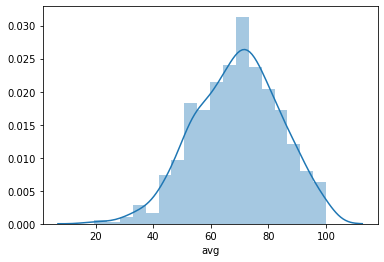

In [89]:
sns.distplot(train['avg'])

In [90]:
train['avg'].min()

19.5

In [91]:
train.loc[432]

gender                              1
lunch                               1
test preparation course             0
reading score                     100
writing score                      95
                                 ... 
ReadCourse_Avg_IncompleteFail       0
ReadCourse_Avg_IncompletePass       0
WriteCourse_Avg_CompletePass        1
WriteCourse_Avg_IncompleteFail      0
WriteCourse_Avg_IncompletePass      0
Name: 432, Length: 65, dtype: object

In [92]:
import scipy.stats as stats

In [93]:
train['Log_read']=np.log(train['reading score']+1)
train['Log_write']=np.log(train['writing score']+1)
train['sqr_read']= train['reading score']**(1/2)
train['sqr_write']= train['writing score']**(1/2)
train['Exp_read']= train['reading score']**(1/5)
train['Exp_write']= train['writing score']**(1/5)
train['read_boxcox'], param = stats.boxcox(train['reading score']+1)
train['write_boxcox'], param = stats.boxcox(train['writing score']+1)

In [94]:
train['ratio'] = (train['reading score']/train['writing score'])*100

In [95]:
train.head()

,gender,lunch,test preparation course,reading score,writing score,math score,reading score ^2,writing score ^2,reading score x writing score,reading score ^3,...,WriteCourse_Avg_IncompletePass,Log_read,Log_write,sqr_read,sqr_write,Exp_read,Exp_write,read_boxcox,write_boxcox,ratio
0,1,1,1,61,62,61,3721,3844,3782,226981,...,0,4.127134,4.143135,7.810250,7.874008,2.275443,2.282855,162.632167,176.756102,98.387097
1,0,1,1,62,53,53,3844,2809,3286,238328,...,0,4.143135,3.988984,7.874008,7.280110,2.282855,2.212357,166.061286,144.154026,116.981132
2,0,0,0,75,70,67,5625,4900,5250,421875,...,0,4.330733,4.262680,8.660254,8.366600,2.371441,2.338943,212.058730,207.009246,107.142857
3,1,0,1,76,65,79,5776,4225,4940,438976,...,0,4.343805,4.189655,8.717798,8.062258,2.377731,2.304532,215.700750,187.966579,116.923077
4,1,0,1,58,44,53,3364,1936,2552,195112,...,0,4.077537,3.806662,7.615773,6.633250,2.252608,2.131526,152.444230,113.232944,131.818182


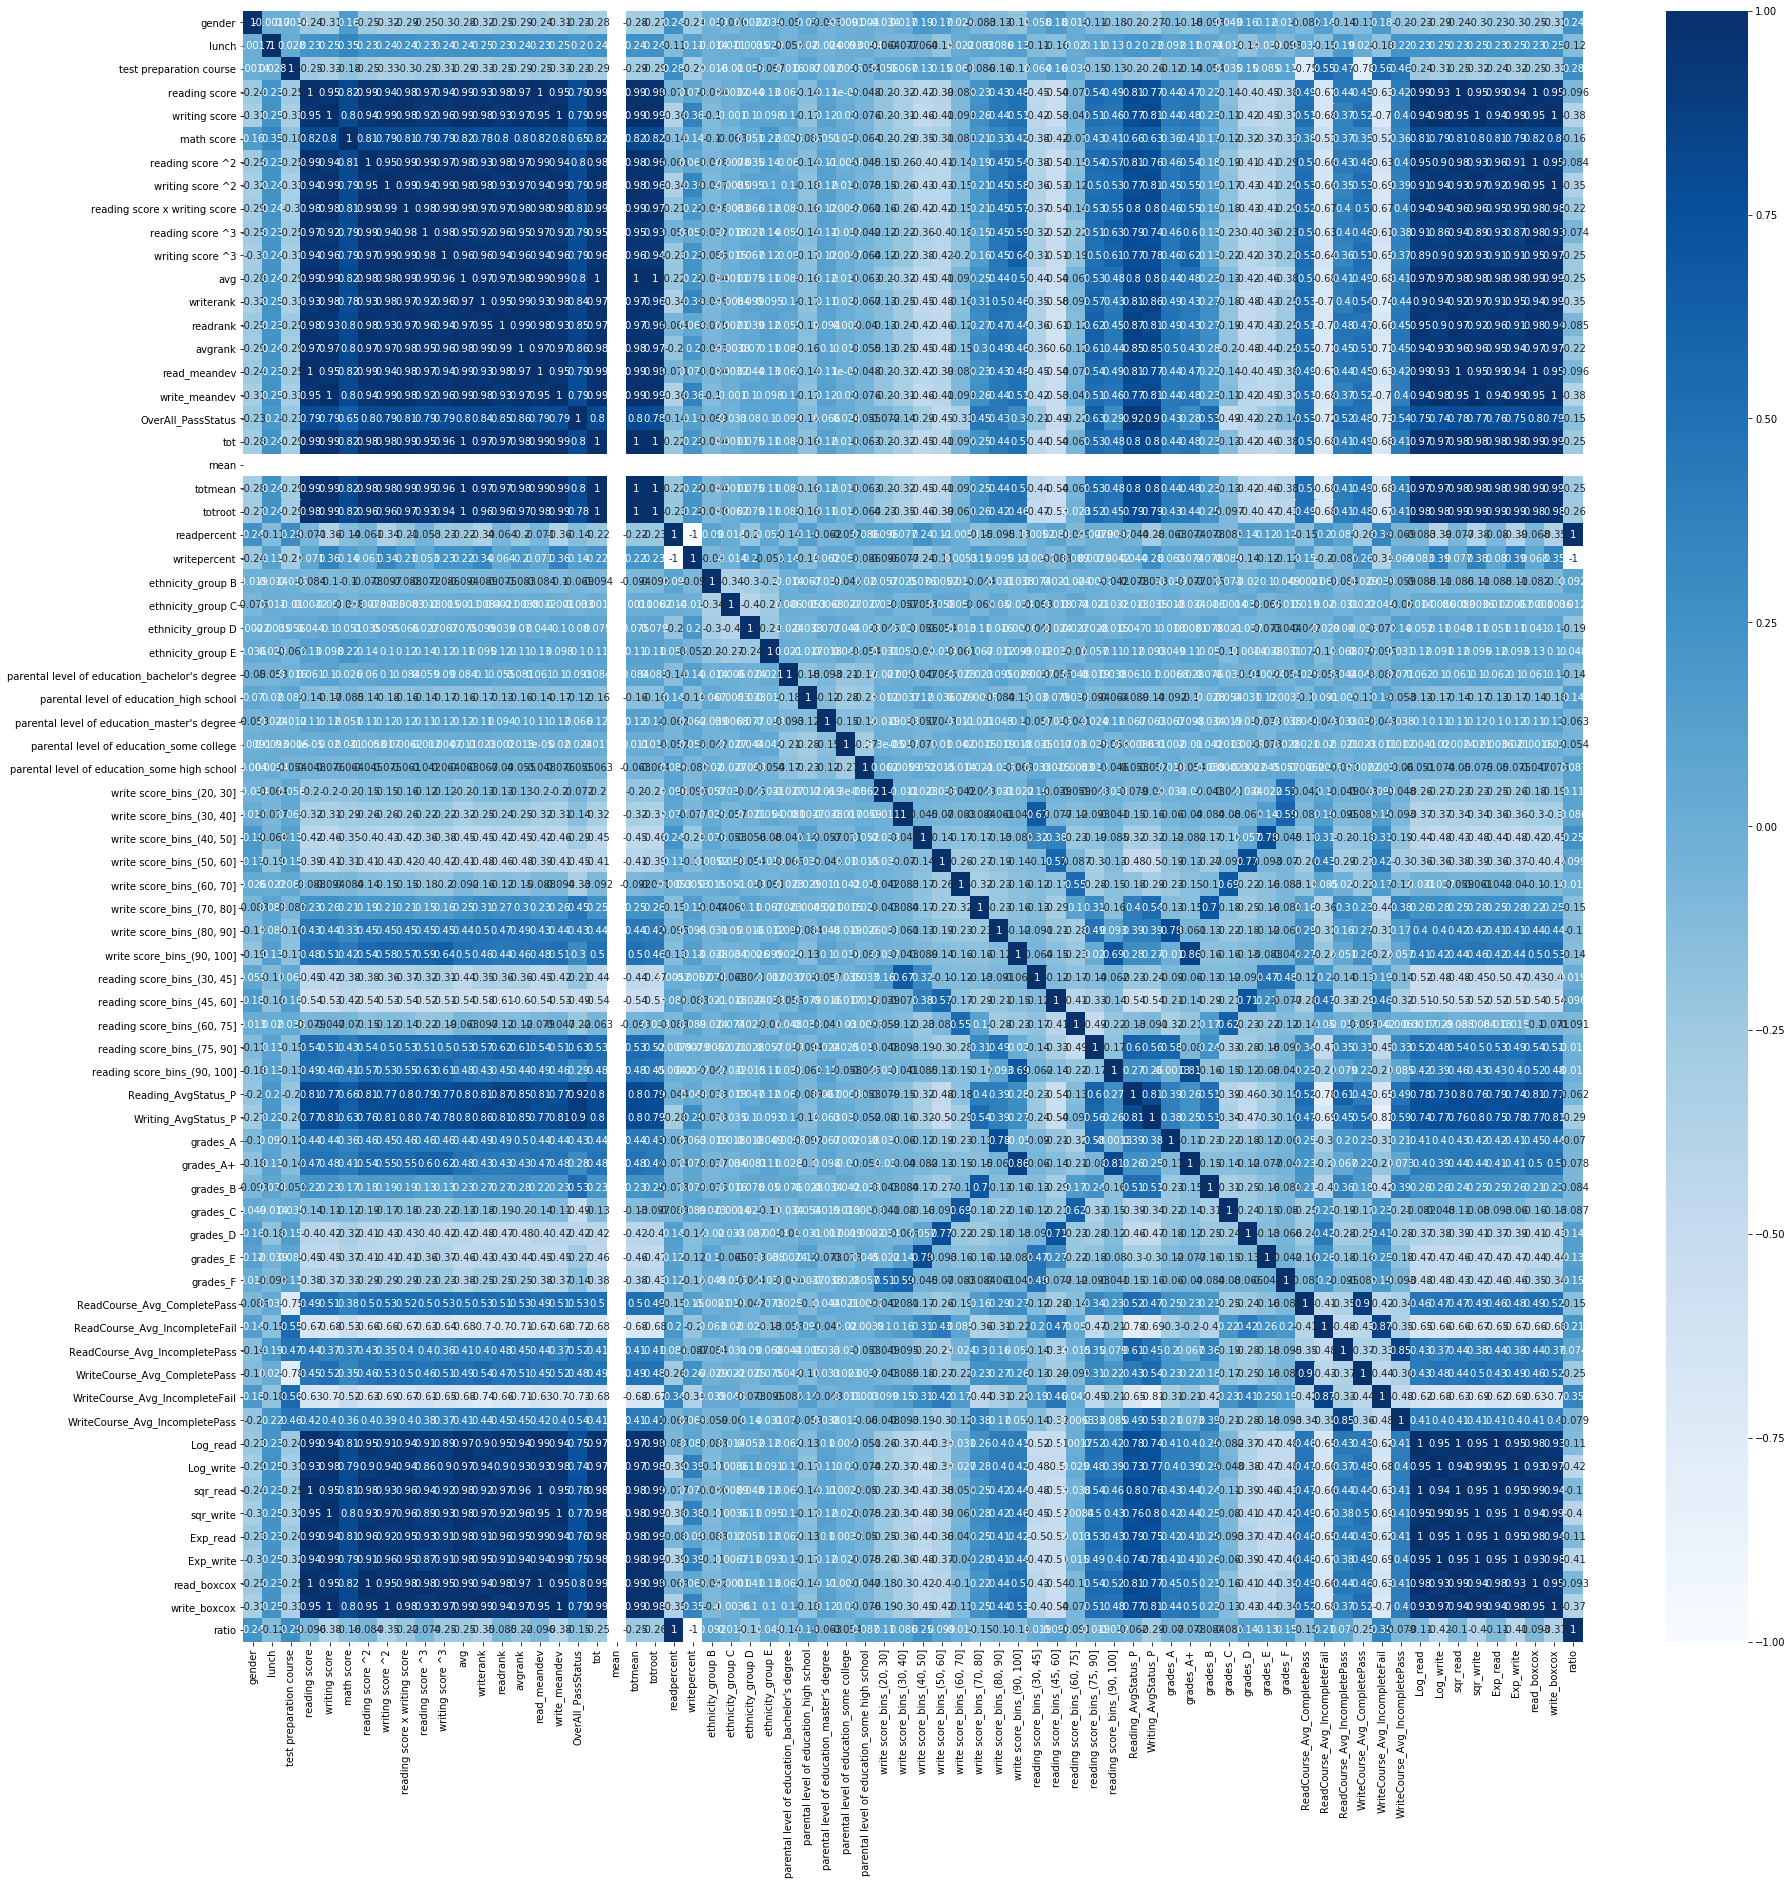

In [96]:
plt.figure(figsize=(30, 30))
sns.heatmap(train.corr(), annot=True, cmap='Blues')

In [97]:
train.columns

Index(['gender', 'lunch', 'test preparation course', 'reading score',
       'writing score', 'math score', 'reading score ^2', 'writing score ^2',
       'reading score x writing score', 'reading score ^3', 'writing score ^3',
       'avg', 'writerank', 'readrank', 'avgrank', 'read_meandev',
       'write_meandev', 'OverAll_PassStatus', 'Ethinicity_Gen',
       'Ethinicity_lunch', 'Parent Degree', 'avg score_bins', 'tot', 'mean',
       'totmean', 'totroot', 'readpercent', 'writepercent',
       'ethnicity_group B', 'ethnicity_group C', 'ethnicity_group D',
       'ethnicity_group E', 'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school',
       'write score_bins_(20, 30]', 'write score_bins_(30, 40]',
       'write score_bins_(40, 50]', 'write score_bins_(50, 60]',
       'write scor

In [98]:
y = train['math score']

In [99]:
train.head()

,gender,lunch,test preparation course,reading score,writing score,math score,reading score ^2,writing score ^2,reading score x writing score,reading score ^3,...,WriteCourse_Avg_IncompletePass,Log_read,Log_write,sqr_read,sqr_write,Exp_read,Exp_write,read_boxcox,write_boxcox,ratio
0,1,1,1,61,62,61,3721,3844,3782,226981,...,0,4.127134,4.143135,7.810250,7.874008,2.275443,2.282855,162.632167,176.756102,98.387097
1,0,1,1,62,53,53,3844,2809,3286,238328,...,0,4.143135,3.988984,7.874008,7.280110,2.282855,2.212357,166.061286,144.154026,116.981132
2,0,0,0,75,70,67,5625,4900,5250,421875,...,0,4.330733,4.262680,8.660254,8.366600,2.371441,2.338943,212.058730,207.009246,107.142857
3,1,0,1,76,65,79,5776,4225,4940,438976,...,0,4.343805,4.189655,8.717798,8.062258,2.377731,2.304532,215.700750,187.966579,116.923077
4,1,0,1,58,44,53,3364,1936,2552,195112,...,0,4.077537,3.806662,7.615773,6.633250,2.252608,2.131526,152.444230,113.232944,131.818182


In [100]:
x = train[['gender', 'lunch', 'test preparation course',
       'write_meandev', 
     'ethnicity_group E',
       "parental level of education_bachelor's degree",
       "parental level of education_master's degree","readrank",
       'Writing_AvgStatus_P','grades_A',
       'ReadCourse_Avg_IncompleteFail']]

In [101]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

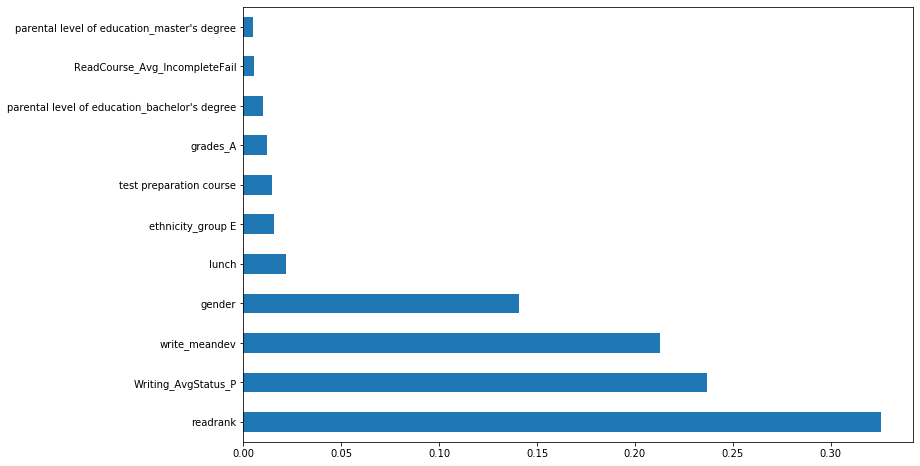

In [102]:
plt.figure(figsize=(12,8))
impft = pd.Series(model.feature_importances_, index=x.columns)
impft.nlargest(20).plot(kind='barh')
plt.show()

In [103]:
x = sm.add_constant(x) 
result = sm.OLS(y,x).fit() 
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             math score   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     473.4
Date:                Wed, 17 Feb 2021   Prob (F-statistic):          6.51e-312
Time:                        23:10:47   Log-Likelihood:                -2137.6
No. Observations:                 699   AIC:                             4299.
Df Residuals:                     687   BIC:                             4354.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [104]:
vif_data = pd.DataFrame() 
vif_data["feature"] = x.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x.values, i) 
                          for i in range(len(x.columns))] 
  
print(vif_data)

                                          feature        VIF
0                                           const  37.486554
1                                          gender   1.171129
2                                           lunch   1.114199
3                         test preparation course   1.724440
4                                   write_meandev  10.231518
5                               ethnicity_group E   1.026814
6   parental level of education_bachelor's degree   1.055778
7     parental level of education_master's degree   1.041173
8                                        readrank  10.855786
9                             Writing_AvgStatus_P   3.456134
10                                       grades_A   1.336092
11                  ReadCourse_Avg_IncompleteFail   3.112744


In [105]:
x.drop('const', axis = 1 , inplace = True)

In [106]:
reg = LinearRegression()

In [107]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)

In [108]:
model = reg.fit(x_train,y_train)

In [109]:
y_pred_reg = reg.predict(x_test)
from sklearn.metrics import r2_score
score_reg = r2_score(y_test,y_pred_reg)
score_reg

0.883270504306177

In [110]:
rmse_lin = r(mse(y_test, y_pred_reg))
print('RMSE Lin:', rmse_lin)

RMSE Lin: 5.518348528310213


In [111]:
test.head()

,Unnamed: 0,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,reading score_bins,write score_bins
0,0,female,group C,some college,standard,none,67,72,"(60, 75]","(70, 80]"
1,1,male,group E,some college,standard,none,60,59,"(45, 60]","(50, 60]"
2,2,female,group C,bachelor's degree,standard,none,93,95,"(90, 100]","(90, 100]"
3,3,male,group D,associate's degree,standard,none,48,46,"(45, 60]","(40, 50]"
4,4,female,group B,associate's degree,standard,none,76,80,"(75, 90]","(70, 80]"


In [112]:
test['avg'] = (test['reading score']+test['writing score'])/2

In [113]:
test['avg'].min()

13.5

In [114]:
test['avg'].max()

100.0

In [115]:
test['avg score_bins'] = pd.cut(test['avg'], avg_bin)

In [116]:
test['read_meandev'] = test['reading score'] - test['reading score'].mean()

In [117]:
test['write_meandev'] = test['writing score'] - test['writing score'].mean()

In [118]:
test['readrank'] = test[['reading score']].rank(method = 'first')
test['avgrank'] = test[['avg']].rank(method = 'first')

In [119]:
test['grades'] = test['avg'].apply(lambda x : define_grades(x))

In [120]:
test['Reading_AvgStatus'] = np.where(test['reading score']<= test['reading score'].mean(), 'F', 'P')

In [121]:
test['Writing_AvgStatus'] = np.where(test['writing score']<= test['writing score'].mean(), 'F', 'P')

In [122]:
test['OverAll_PassStatus'] = test.apply(lambda x : 'F' if x['Reading_AvgStatus'] == 'F' or x['Writing_AvgStatus'] == 'F' else 'P', axis =1)

In [123]:
test['ReadCourse_Avg'] = test.apply(lambda x : 'CompleteFail' if x['Reading_AvgStatus'] == 'F' and  x['test preparation course'] == 'completed' else ( 'CompletePass' if x['Reading_AvgStatus'] == 'P' and  x['test preparation course'] == 'completed' else ('IncompletePass' if x['Reading_AvgStatus'] == 'P' and  x['test preparation course'] == 'none' else 'IncompleteFail')) , axis =1)

In [124]:
test['WriteCourse_Avg'] = test.apply(lambda x : 'CompleteFail' if x['Writing_AvgStatus'] == 'F' and  x['test preparation course'] == 'completed' else ( 'CompletePass' if x['Writing_AvgStatus'] == 'P' and  x['test preparation course'] == 'completed' else ('IncompletePass' if x['Writing_AvgStatus'] == 'P' and  x['test preparation course'] == 'none' else 'IncompleteFail')) , axis =1)

In [125]:
test['test preparation course']= label_encoder.fit_transform(test['test preparation course']) 
test['gender']= label_encoder.fit_transform(test['gender'])
test['lunch']= label_encoder.fit_transform(test['lunch'])
test['OverAll_PassStatus']= label_encoder.fit_transform(test['OverAll_PassStatus']) 

In [126]:
test = pd.get_dummies(test, columns=['ethnicity', 'parental level of education','write score_bins','reading score_bins','Reading_AvgStatus','Writing_AvgStatus','grades','ReadCourse_Avg','WriteCourse_Avg'], drop_first=True)

In [127]:
test1 = test[['gender', 'lunch', 'test preparation course',
       'write_meandev', 
     'ethnicity_group E',
       "parental level of education_bachelor's degree",
       "parental level of education_master's degree","readrank",
       'Writing_AvgStatus_P','grades_A',
       'ReadCourse_Avg_IncompleteFail']]

In [128]:
op = reg.predict(test1)

In [129]:
op

array([61.56223404, 69.71599763, 78.96580847, 54.25561251, 67.59657801,
       79.76204831, 63.4221316 , 63.74226963, 76.73072392, 66.8581162 ,
       77.36979997, 54.56720014, 55.53806164, 87.09928526, 42.16006382,
       58.16493641, 68.78333838, 67.6227917 , 55.48757455, 56.26271548,
       66.99067937, 76.44696668, 64.4593352 , 64.44770772, 49.62344321,
       42.13196324, 27.81522646, 45.45294037, 52.08932901, 35.52443788,
       51.04955428, 52.99106339, 70.47780174, 52.37143065, 69.87369418,
       62.48707518, 65.98851814, 62.54530421, 66.1306918 , 68.47237345,
       60.21391173, 46.67731424, 56.51791024, 51.41255542, 52.20447556,
       76.81116684, 51.00552028, 67.34015959, 69.90318906, 52.67565322,
       50.27257718, 65.98299944, 76.78218028, 80.0039163 , 68.77219427,
       69.77071582, 54.7566393 , 61.72252075, 73.81017505, 80.06234499,
       72.85170374, 68.75872862, 67.28601471, 49.12075192, 73.19016097,
       54.34984654, 55.70133421, 80.73237133, 53.29075309, 64.57

In [130]:
submission = pd.DataFrame({'idx': test.index, 'math_score': op})
submission.to_csv('outputop.csv', index=False)

In [131]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [132]:
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [133]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.15,random_state = 1)

In [134]:
train.head()

,gender,lunch,test preparation course,reading score,writing score,math score,reading score ^2,writing score ^2,reading score x writing score,reading score ^3,...,WriteCourse_Avg_IncompletePass,Log_read,Log_write,sqr_read,sqr_write,Exp_read,Exp_write,read_boxcox,write_boxcox,ratio
0,1,1,1,61,62,61,3721,3844,3782,226981,...,0,4.127134,4.143135,7.810250,7.874008,2.275443,2.282855,162.632167,176.756102,98.387097
1,0,1,1,62,53,53,3844,2809,3286,238328,...,0,4.143135,3.988984,7.874008,7.280110,2.282855,2.212357,166.061286,144.154026,116.981132
2,0,0,0,75,70,67,5625,4900,5250,421875,...,0,4.330733,4.262680,8.660254,8.366600,2.371441,2.338943,212.058730,207.009246,107.142857
3,1,0,1,76,65,79,5776,4225,4940,438976,...,0,4.343805,4.189655,8.717798,8.062258,2.377731,2.304532,215.700750,187.966579,116.923077
4,1,0,1,58,44,53,3364,1936,2552,195112,...,0,4.077537,3.806662,7.615773,6.633250,2.252608,2.131526,152.444230,113.232944,131.818182


In [135]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model


In [136]:
tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=10,
    executions_per_trial=3,
    directory='project',
    project_name='Exam mark')

INFO:tensorflow:Reloading Oracle from existing project project\Exam mark\oracle.json
INFO:tensorflow:Reloading Tuner from project\Exam mark\tuner0.json


In [137]:
tuner.search(X_train, Y_train,
             epochs=5,
             validation_data=(X_test, Y_test))

INFO:tensorflow:Oracle triggered exit


In [138]:
tuner.results_summary()

Results summary
Results in project\Exam mark
Showing 10 best trials
Objective(name='val_mean_absolute_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 12
units_0: 320
units_1: 512
learning_rate: 0.01
units_2: 416
units_3: 416
units_4: 64
units_5: 384
units_6: 288
units_7: 448
units_8: 352
units_9: 64
units_10: 384
units_11: 160
units_12: 256
units_13: 96
units_14: 224
units_15: 480
units_16: 384
units_17: 128
units_18: 384
units_19: 64
Score: 8.746302286783854
Trial summary
Hyperparameters:
num_layers: 20
units_0: 192
units_1: 448
learning_rate: 0.001
units_2: 32
units_3: 512
units_4: 416
units_5: 224
units_6: 224
units_7: 288
units_8: 448
units_9: 96
units_10: 192
units_11: 288
units_12: 288
units_13: 416
units_14: 480
units_15: 64
units_16: 384
units_17: 384
units_18: 288
units_19: 32
Score: 8.885623931884766
Trial summary
Hyperparameters:
num_layers: 7
units_0: 160
units_1: 288
learning_rate: 0.001
units_2: 448
units_3: 160
units_4: 128
units_5: 288
units_6: 224
u

In [139]:
X_train.shape

(594, 11)

In [140]:
model = Sequential()
model.add(Dense(416, input_dim=11, activation='relu'))
model.add(Dense(416, input_dim=416, activation='relu'))
model.add(Dense(64, input_dim= 416, activation='relu'))
model.add(Dense(384, input_dim= 64, activation='relu'))
model.add(Dense(288, input_dim= 384, activation='relu'))
model.add(Dense(448, input_dim= 288, activation='relu'))
model.add(Dense(352, input_dim= 448, activation='relu'))
model.add(Dense(64, input_dim= 352, activation='relu'))
model.add(Dense(384, input_dim= 64, activation='relu'))
model.add(Dense(160, input_dim= 384, activation='relu'))
model.add(Dense(256, input_dim= 160, activation='relu'))
model.add(Dense(96, input_dim= 256, activation='relu'))
model.add(Dense(224, input_dim= 96, activation='relu'))
model.add(Dense(480, input_dim= 224, activation='relu'))
model.add(Dense(384, input_dim= 480, activation='relu'))
model.add(Dense(128, input_dim= 384, activation='relu'))
model.add(Dense(384, input_dim= 128, activation='relu'))
model.add(Dense(64, input_dim= 384, activation='relu'))
model.add(Dense(1, activation='linear'))

In [141]:
keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['mean_absolute_percentage_error'])

In [142]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 416)               4992      
_________________________________________________________________
dense_4 (Dense)              (None, 416)               173472    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                26688     
_________________________________________________________________
dense_6 (Dense)              (None, 384)               24960     
_________________________________________________________________
dense_7 (Dense)              (None, 288)               110880    
_________________________________________________________________
dense_8 (Dense)              (None, 448)               129472    
_________________________________________________________________
dense_9 (Dense)              (None, 352)              

In [143]:
history = model.fit(X_train, Y_train, epochs=50, batch_size= 10,validation_split=0.15,validation_data=None,verbose=1)

Epoch 1/150
51/51 [==============================] - 8s 64ms/step - loss: 34640.1249 - mean_absolute_percentage_error: 113.0798 - val_loss: 1412.7787 - val_mean_absolute_percentage_error: 54.7825
Epoch 2/150
51/51 [==============================] - 1s 14ms/step - loss: 934.7806 - mean_absolute_percentage_error: 40.5388 - val_loss: 487.4966 - val_mean_absolute_percentage_error: 28.6207
Epoch 3/150
51/51 [==============================] - 1s 14ms/step - loss: 2569.4347 - mean_absolute_percentage_error: 66.5262 - val_loss: 2109.7822 - val_mean_absolute_percentage_error: 65.6794
Epoch 4/150
51/51 [==============================] - 1s 13ms/step - loss: 1143.9034 - mean_absolute_percentage_error: 43.5683 - val_loss: 3492.8567 - val_mean_absolute_percentage_error: 84.8008
Epoch 5/150
51/51 [==============================] - 1s 14ms/step - loss: 1708.7579 - mean_absolute_percentage_error: 55.4106 - val_loss: 708.2858 - val_mean_absolute_percentage_error: 31.2806
Epoch 6/150
51/51 [============

51/51 [==============================] - 1s 14ms/step - loss: 84.0834 - mean_absolute_percentage_error: 11.6826 - val_loss: 97.0501 - val_mean_absolute_percentage_error: 11.5134
Epoch 44/150
51/51 [==============================] - 1s 14ms/step - loss: 87.5425 - mean_absolute_percentage_error: 11.5103 - val_loss: 47.0378 - val_mean_absolute_percentage_error: 8.6010
Epoch 45/150
51/51 [==============================] - 1s 14ms/step - loss: 95.7451 - mean_absolute_percentage_error: 12.5594 - val_loss: 49.3515 - val_mean_absolute_percentage_error: 9.1699
Epoch 46/150
51/51 [==============================] - 1s 14ms/step - loss: 92.4782 - mean_absolute_percentage_error: 12.1116 - val_loss: 50.3464 - val_mean_absolute_percentage_error: 9.7681
Epoch 47/150
51/51 [==============================] - 1s 13ms/step - loss: 77.6029 - mean_absolute_percentage_error: 11.8742 - val_loss: 94.4669 - val_mean_absolute_percentage_error: 13.7512
Epoch 48/150
51/51 [==============================] - 1s 13ms

51/51 [==============================] - 1s 14ms/step - loss: 59.7188 - mean_absolute_percentage_error: 9.6829 - val_loss: 84.9258 - val_mean_absolute_percentage_error: 12.4628
Epoch 87/150
51/51 [==============================] - 1s 13ms/step - loss: 62.5951 - mean_absolute_percentage_error: 9.9639 - val_loss: 80.5139 - val_mean_absolute_percentage_error: 13.2202
Epoch 88/150
51/51 [==============================] - 1s 13ms/step - loss: 56.0537 - mean_absolute_percentage_error: 9.4063 - val_loss: 118.4206 - val_mean_absolute_percentage_error: 12.8724
Epoch 89/150
51/51 [==============================] - 1s 14ms/step - loss: 65.2989 - mean_absolute_percentage_error: 9.5290 - val_loss: 167.2995 - val_mean_absolute_percentage_error: 16.2582
Epoch 90/150
51/51 [==============================] - 1s 13ms/step - loss: 63.1042 - mean_absolute_percentage_error: 9.7810 - val_loss: 185.4273 - val_mean_absolute_percentage_error: 19.3605
Epoch 91/150
51/51 [==============================] - 1s 14m

51/51 [==============================] - 1s 16ms/step - loss: 51.1746 - mean_absolute_percentage_error: 8.9781 - val_loss: 36.8523 - val_mean_absolute_percentage_error: 7.1829
Epoch 130/150
51/51 [==============================] - 1s 17ms/step - loss: 49.6938 - mean_absolute_percentage_error: 8.9173 - val_loss: 38.5773 - val_mean_absolute_percentage_error: 8.7351
Epoch 131/150
51/51 [==============================] - 1s 17ms/step - loss: 57.6647 - mean_absolute_percentage_error: 9.5898 - val_loss: 38.2494 - val_mean_absolute_percentage_error: 7.0160
Epoch 132/150
51/51 [==============================] - 1s 19ms/step - loss: 42.9791 - mean_absolute_percentage_error: 8.3104 - val_loss: 69.5579 - val_mean_absolute_percentage_error: 9.7279
Epoch 133/150
51/51 [==============================] - 1s 17ms/step - loss: 47.0275 - mean_absolute_percentage_error: 8.5974 - val_loss: 66.2074 - val_mean_absolute_percentage_error: 10.6507
Epoch 134/150
51/51 [==============================] - 1s 17ms/

In [144]:
output = model.predict(test1)

In [145]:
output

array([[67.53321 ],
       [75.11089 ],
       [91.24051 ],
       [51.911144],
       [81.69363 ],
       [91.84875 ],
       [67.73101 ],
       [79.933014],
       [86.04591 ],
       [81.78323 ],
       [84.66457 ],
       [53.55103 ],
       [54.897423],
       [92.87664 ],
       [42.223457],
       [58.106438],
       [73.4359  ],
       [84.441734],
       [56.956154],
       [57.91205 ],
       [82.95138 ],
       [83.7768  ],
       [73.631065],
       [78.9415  ],
       [49.083035],
       [44.693256],
       [21.67806 ],
       [48.424755],
       [53.254955],
       [25.470995],
       [50.674717],
       [54.61505 ],
       [76.264465],
       [55.360065],
       [86.385185],
       [68.64167 ],
       [77.18084 ],
       [74.86089 ],
       [78.7375  ],
       [73.40714 ],
       [67.1439  ],
       [48.652863],
       [57.695324],
       [52.927246],
       [51.435192],
       [83.09789 ],
       [58.65308 ],
       [73.11971 ],
       [76.46261 ],
       [53.44687 ],


In [146]:
submission = pd.DataFrame(output)
submission.to_csv('outputnn.csv', index=False)